## Machine Learning with Brazilian E Commerce

### Contents

#### Import Libraries and Data
#### The Elbow Technique
#### K-Means Clustering

### Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [4]:
# Import data
df = pd.read_pickle(os.path.join(path, 'e_commerce_final.pkl'))
delay = pd.read_csv(os.path.join(path, 'shipping_delays.csv'))

In [5]:
df.shape

(110027, 47)

In [6]:
delay.shape

(8712, 50)

In [7]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_city,customer_state,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,campos dos goytacazes,RJ,cool_stuff,nan,nan,campos dos goytacazes,RJ,8 days 01:58:13,8.0,Average Shipping
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,santa fe do sul,SP,pet_shop,nan,nan,santa fe do sul,SP,16 days 16:59:11,16.0,Slow Shipping
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,para de minas,MG,furniture_decor,nan,nan,pará de minas,MG,8 days 10:30:46,8.0,Average Shipping
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,atibaia,SP,perfumery,nan,nan,atibaia,SP,6 days 15:22:21,6.0,Quick Shipping
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,varzea paulista,SP,garden_tools,nan,nan,varzea paulista,SP,25 days 14:32:18,25.0,Slow Shipping


In [8]:
delay.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed,shipping_delay_num,shipping_delay_days
0,10,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,...,health_beauty,NaN,NaN,santos,SP,9 days 11:42:10,9.0,Average Shipping,1 days 06:17:31,1
1,13,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,1.0,credit_card,...,fashion_bags_accessories,NaN,NaN,monte alto,SP,11 days 07:56:46,11.0,Average Shipping,1 days 01:56:52,1
2,28,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,2017-11-27 19:09:02,21.99,11.85,1.0,credit_card,...,telephony,NaN,NaN,santa cruz do rio pardo,SP,18 days 10:18:21,18.0,Slow Shipping,3 days 05:27:23,3
3,55,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,1.0,credit_card,...,computers_accessories,NaN,NaN,campo alegre,AL,46 days 22:06:48,46.0,Slow Shipping,4 days 20:32:07,4
4,65,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,1.0,credit_card,...,bed_bath_table,NaN,NaN,sao paulo,SP,28 days 07:58:53,28.0,Slow Shipping,9 days 06:37:40,9


In [9]:
delay2 = delay[['order_id', 'shipping_delay_days']]

In [10]:
# merge data
merge = df.merge(delay2, on = 'order_id')

In [11]:
merge.shape

(11672, 48)

In [12]:
dups = merge.duplicated()
dups.shape

(11672,)

In [13]:
merge.dtypes

order_id                                  object
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
payment_sequential                       float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score                             float64
review_comment_title                      object
review_comment_message                    object
review_creation_date              datetime64[ns]
review_answer_timestamp           datetime64[ns]
customer_id                               object
order_status                              object
order_purchase_timestamp                  object
order_approved_at   

In [14]:
sub = delay[['price', 'freight_value','payment_value', 'review_score', 'shipping_days', 'shipping_delay_days', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [15]:
sub

,price,freight_value,payment_value,review_score,shipping_days,shipping_delay_days,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,145.95,11.65,157.60,1.0,9.0,1,2000.0,30.0,12.0,16.0
1,45.00,12.98,57.98,5.0,11.0,1,200.0,16.0,16.0,11.0
2,21.99,11.85,33.84,3.0,18.0,3,300.0,17.0,4.0,12.0
3,809.10,44.29,853.39,1.0,46.0,4,3407.0,28.0,22.0,23.0
4,99.00,13.71,112.71,2.0,28.0,9,1550.0,44.0,14.0,34.0
...,...,...,...,...,...,...,...,...,...,...
8707,21.90,15.79,113.07,2.0,30.0,8,150.0,30.0,10.0,20.0
8708,21.90,15.79,113.07,2.0,30.0,8,150.0,30.0,10.0,20.0
8709,129.99,12.11,142.10,1.0,17.0,6,1600.0,42.0,25.0,15.0
8710,24.99,25.63,50.62,2.0,38.0,7,300.0,17.0,4.0,12.0


In [16]:
sub.isnull().sum()

price                    0
freight_value            0
payment_value            3
review_score           195
shipping_days            0
shipping_delay_days      0
product_weight_g       144
product_length_cm      144
product_height_cm      144
product_width_cm       144
dtype: int64

In [17]:
sub = sub.dropna()

### The Elbow Technique

In [18]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]
score

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

[-154474638439.89337,
 -44713510779.07209,
 -20585558183.068336,
 -12094307328.003574,
 -8556494337.83392,
 -5747036886.294506,
 -4419761370.588839,
 -3355258106.8491983,
 -2709797481.3836317]

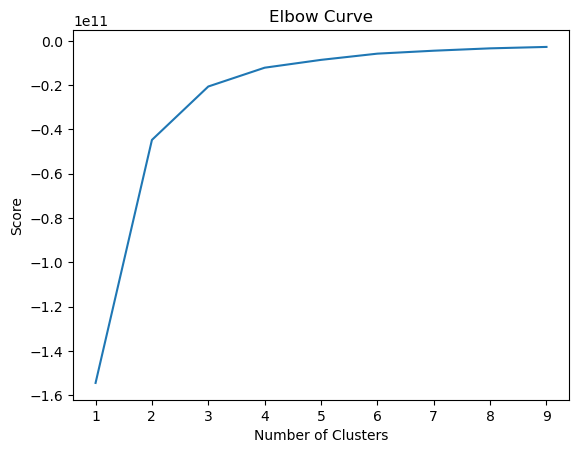

In [20]:
# plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Since the curve starts to flatten out after 3, 3 would be the optimal count of clusters to use for this data.

### K-Means Clustering

In [21]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [22]:
# Fit the k-means object to the data
kmeans.fit(sub)

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [23]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_25319/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [24]:
sub.head()

,price,freight_value,payment_value,review_score,shipping_days,shipping_delay_days,product_weight_g,product_length_cm,product_height_cm,product_width_cm,clusters
0,145.95,11.65,157.60,1.0,9.0,1,2000.0,30.0,12.0,16.0,0
1,45.00,12.98,57.98,5.0,11.0,1,200.0,16.0,16.0,11.0,0
2,21.99,11.85,33.84,3.0,18.0,3,300.0,17.0,4.0,12.0,0
3,809.10,44.29,853.39,1.0,46.0,4,3407.0,28.0,22.0,23.0,0
4,99.00,13.71,112.71,2.0,28.0,9,1550.0,44.0,14.0,34.0,0


In [25]:
sub['clusters'].value_counts()

clusters
0    7175
2     938
1     260
Name: count, dtype: int64

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


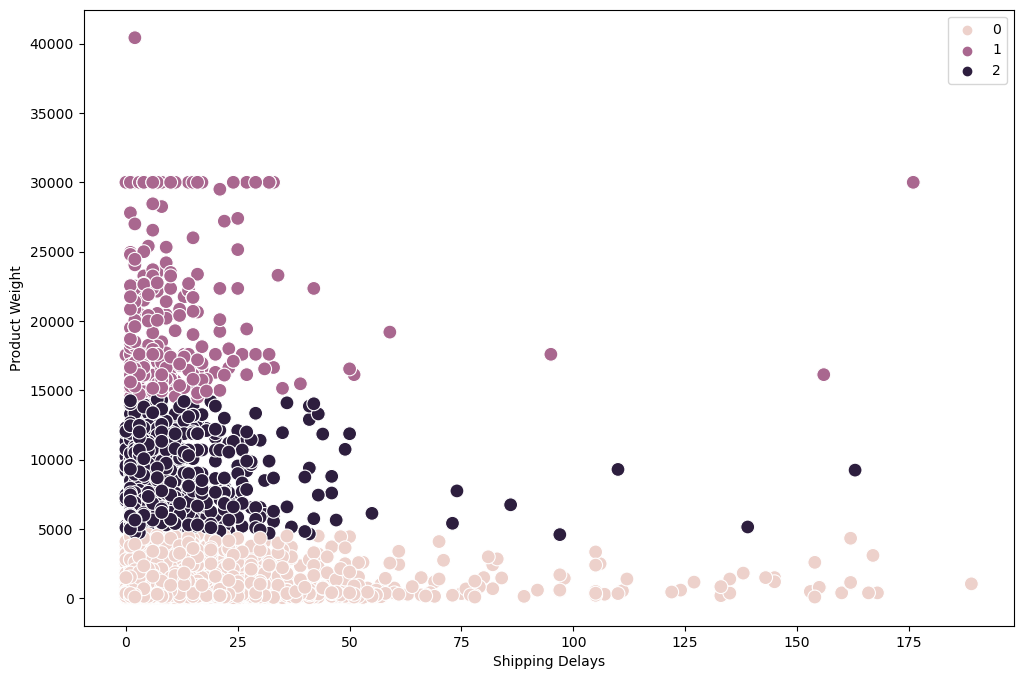

In [26]:
# Plot the clusters for the shipping delays and freight cost
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['shipping_delay_days'], y = sub['product_weight_g'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Shipping Delays')
plt.ylabel('Product Weight')
plt.show()

After comparing the shipping delays with the weights of the products, we can see the obvious division in the cluster, however it does not seem to impact the delivery being delayed.

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


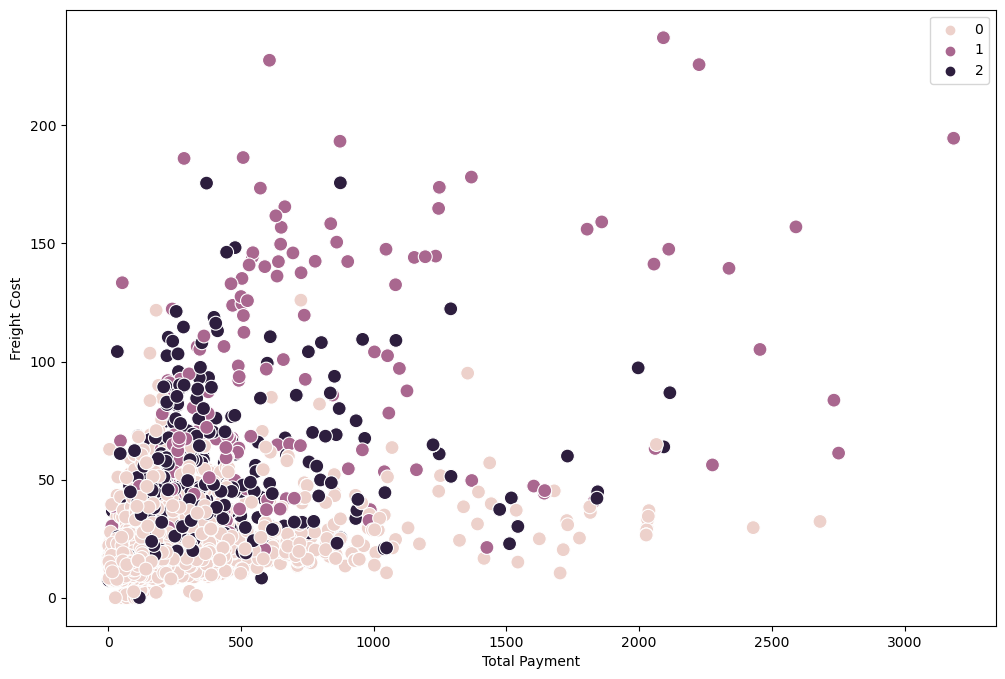

In [27]:
# Plot the clusters for the payment value and freight value
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['payment_value'], y = sub['freight_value'], hue=kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Total Payment')
plt.ylabel('Freight Cost')
plt.show()

The dark purple is indicating some of the higher priced payments as well as correlating to the highest freight costs as well. 

In [28]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_25319/749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_25319/749661046.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
sub.groupby('cluster').agg({'payment_value':['mean', 'median'],
                           'freight_value':['mean', 'median'],
                           'shipping_delay_days':['mean', 'median'],
                            'product_weight_g':['mean', 'median']})

payment_value          freight_value        shipping_delay_days  \
                     mean   median          mean median                mean   
cluster                                                                       
dark purple    277.842409  201.825     35.973657  28.68            9.437100   
pink           152.018838  104.080     18.433286  16.60            9.391220   
purple         641.034231  448.760     73.518615  56.47           11.842308   

                   product_weight_g           
            median             mean   median  
cluster                                       
dark purple    6.0      8299.492537   7600.0  
pink           6.0       944.536446    584.0  
purple         8.0     20580.492308  18350.0

Taking a look at the statistics, we can see the dark purple cluster has the highest numbers of all 3 clusters for all categories. Much higher average and median payment value, at least double the frieght value, longer delays, and a heavier product on average. This could consist of some larger applicances or home decor that is more expensive and takes more effort to ship. I would like to look into this further to see what categories these items are in. 